<center> 
    
# Lab Exercises: Hypothesis Testing
</center>

In [146]:
# import important libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

## Fetching Data from IBM Cloud Storage

In [148]:
# URL of the CSV file from IBM cloud storage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv"

# Load into a DataFrame
ratings_df = pd.read_csv(url)
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


## Lab Exercises



#### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?

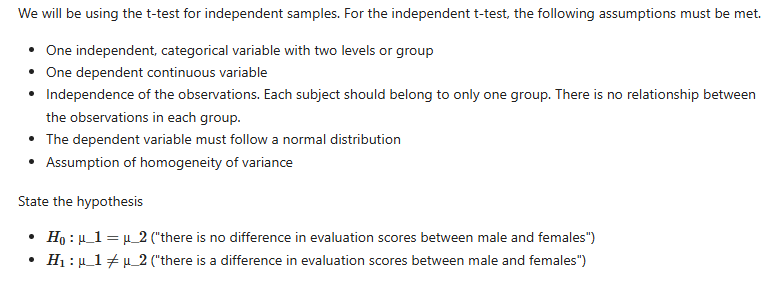

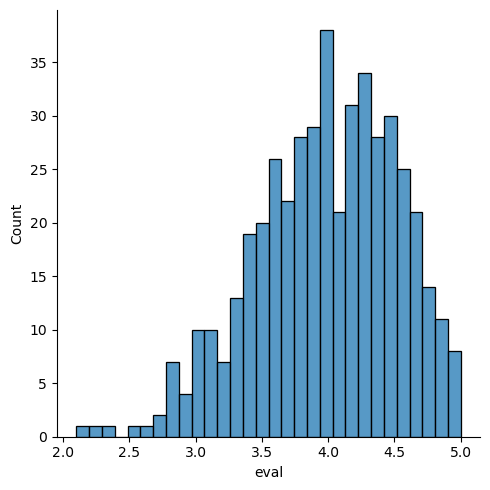

In [151]:
# plot the dependent variable in histogram 

ax = sns.displot(ratings_df['eval'], kde = False, bins=30)

We can use the Levene's Test in Python to check test significance

In [153]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'], ratings_df[ratings_df['gender'] == 'male']['eval'],
                   center = 'mean')


LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

Since the p-value is greater than 0.05, we fail to reject the null hypothesis and can assume the equality of variances. It is important to take note of the assumption of equal variances because if the variances are unequal, the results of statistical tests may become unreliable, potentially leading to incorrect conclusions.


Next we will use the <code>ttest_ind</code> from the <code>scipy_stats</code> library to test our hypothesis

In [155]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

TtestResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217, df=461.0)

**Conclusion** : Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender

### ANOVA: Using the teachers' rating data set, does beauty score for instructors differ by age?

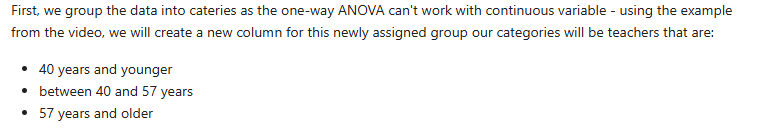

In [158]:
ratings_df['age_group'] = np.where(ratings_df['age'] <= 40, '40 years and younger',
                          np.where((ratings_df['age'] > 40) & (ratings_df['age'] < 57), 'between 40 and 57 years',
                          np.where(ratings_df['age'] >= 57, '57 years and older', 'null')))

ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_group
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1,40 years and younger
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1,40 years and younger
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1,40 years and younger
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1,40 years and younger
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1,57 years and older


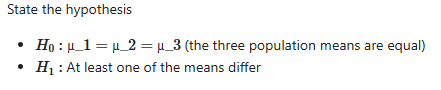

In [160]:
# first test the equality of variance 
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

Since the p-value is greater than 0.05, we fail to reject the null hypothesis and can assume the equality of variances.

In [162]:
# First, separate the three samples (one for each job category) into a variable each.
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']


In [206]:
forty_lower

0      0.289916
1      0.289916
2      0.289916
3      0.289916
9     -0.677963
         ...   
450    1.231394
451    1.231394
456   -0.848727
458    0.933396
461    0.643014
Name: beauty, Length: 113, dtype: float64

In [163]:
# now we will run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
if p_value < 0.05:
    print("Reject H₀: There is a significant evidence that at least one of the means differ.")
else:
    print("Fail to reject H₀: No significant difference between the groups.")

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08
Reject H₀: There is a significant evidence that at least one of the means differ.


### ANOVA: Using the teachers' rating data set, does teaching evaluation score for instructors differ by age?

In [165]:
# same process with beuaty score for instructors differ by age
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], 
                   center='mean')

LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

Since the p-value is greater than 0.05, we fail to reject the null hypothesis and can assume the equality of variances.

In [167]:
forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
if p_value < 0.05:
    print("Reject H₀: There is a significant evidence that at least one of the means differ.")
else:
    print("Fail to reject H₀: No significant difference between the groups.")

F_Statistic: 1.2226327996572206, P-Value: 0.29540894225417536
Fail to reject H₀: No significant difference between the groups.


### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?

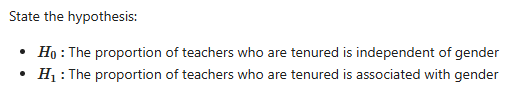

First create a cross-table tab

In [170]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [171]:
x, p_value, dof, expected_val = scipy.stats.chi2_contingency(cont_table, correction = True)
if p_value < 0.05:
    print("Reject H₀: There is a significant evidence that at least one of the means differ.")
else:
    print("Fail to reject H₀: No significant evidence that teachers are tenured as a result of gender.")

Fail to reject H₀: No significant evidence that teachers are tenured as a result of gender.


### Correlation: Using the teachers rating dataset, Is teaching evaluation score correlated with beauty score?
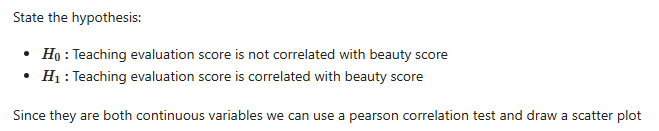

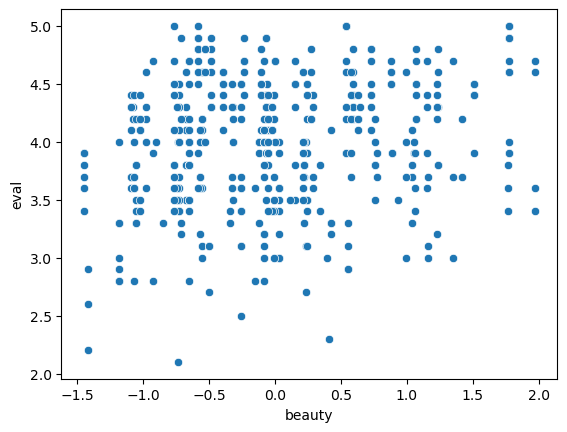

In [173]:
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [174]:
r, p_value = scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])
if p_value < 0.05:
    print("Reject H₀: There is a significant evidence that teaching evaluation score is correlated with beauty score.")
else:
    print("Fail to reject H₀: No significant evidence that Teaching evaluation score is correlated with beauty score.")

Reject H₀: There is a significant evidence that teaching evaluation score is correlated with beauty score.


### Practice Questions

### Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?
Use α = 0.05

- Null hypothesis (H_0): Being tenured has no effect on teaching evaluation scores.
- Alternative hypothesis (H_1): Being tenured has an effect on teaching evaluation scores.

In [177]:
# first check the equality of variance
stats, p_value = scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                                    ratings_df[ratings_df['tenure'] == 'no']['eval'],
                                    center = 'mean')
if p_value > 0.05:
    print('Since the p-value is greater than 0.05, we fail to reject the null hypothesis and can assume the equality of variances.')
else:
    print('Since the p-value is less than 0.05, we reject the null hypothesis and can assume that the variance are not equaly.')

Since the p-value is greater than 0.05, we fail to reject the null hypothesis and can assume the equality of variances.


In [204]:
# since the variances are roughly equal. Then we will use t-test to test if does tenure affect teaching evaluation scores.
stats, p_value = scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                   ratings_df[ratings_df['tenure'] == 'no']['eval'], equal_var = True)

if p_value > 0.05:
    print('Since the p-value is greater than 0.05, we fail to reject the null hypothesis. It means that there are no significant evidence that being tenured affect teaching evaluation scores')
else:
    print('Since the p-value is less than 0.05, we reject the null hypothesis and can assume there are significant evidence that being tenured affect teaching evaluation scores')


Since the p-value is less than 0.05, we reject the null hypothesis and can assume there are significant evidence that being tenured affect teaching evaluation scores


### Question 2: Using the teachers rating data set, is there an association between age and tenure?
- Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
- What is your conclusion at α = 0.01 and α = 0.05?

In [215]:
# Create contingency table
contingency_table = pd.crosstab(ratings_df['age_group'], ratings_df['tenure'])

# Perform Chi-Square Test
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table, correction = True)

# Print results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 8.7496
P-value: 0.0126


### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors
Use α = 0.05

In [218]:
# first check the equality of variance
stats, p_value = scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                                    ratings_df[ratings_df['tenure'] == 'no']['beauty'],
                                    center = 'mean')
if p_value > 0.05:
    print('Since the p-value is greater than 0.05, we fail to reject the null hypothesis and can assume the equality of variances.')
else:
    print('Since the p-value is less than 0.05, we reject the null hypothesis and can assume that the variance are not equaly.')

Since the p-value is greater than 0.05, we fail to reject the null hypothesis and can assume the equality of variances.


### Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?
Use α = 0.05

In [220]:
# Create contingency table
contingency_table = pd.crosstab(ratings_df['minority'], ratings_df['tenure'])

# Perform Chi-Square Test
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table, correction = True)

# Print results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 1.3675
P-value: 0.2422


In [ ]:
asdfasdffsd